# Projet Python(Machine Learning)

### importation des biblotheques

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import xgboost as xgb

## Data Exploration

In [146]:
#chargement du jeu de donnée
data=pd.read_csv("train.csv")
data.head() #l'affichage des 5 premiers lignes

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [147]:
data.tail() #l'affichage des 5 derniers lignes

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [148]:
data.shape #l'affichage des dimensions

(1460, 81)

In [149]:
data.columns #l'affichage des colonnes

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [150]:
data.info() #l'affichage des information sur l'ensemble des colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
data.dtypes #l'affichage des differents types des colonnes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [152]:
df=data.select_dtypes(include=['int64','float64'])#extraction des colonnes numerique

In [153]:
df.describe().T #A

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


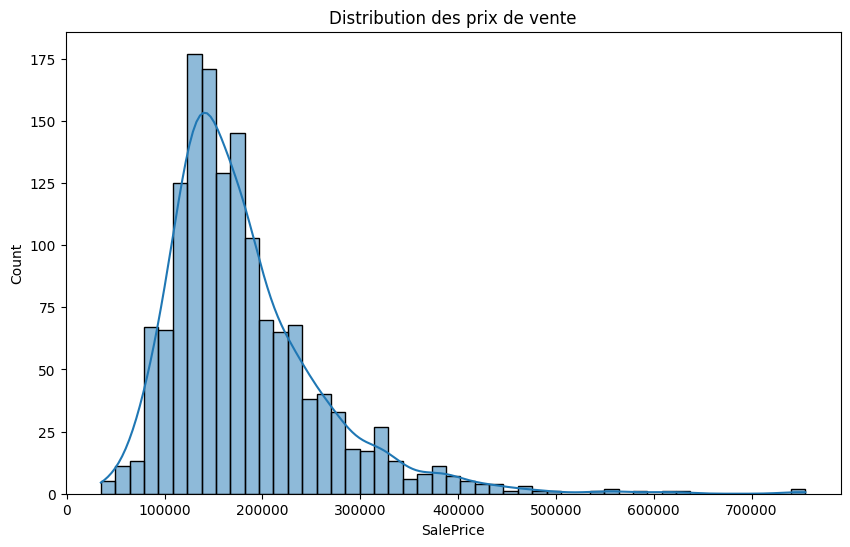

In [154]:
# Visualisation des distributions du variable SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution des prix de vente')
plt.show()

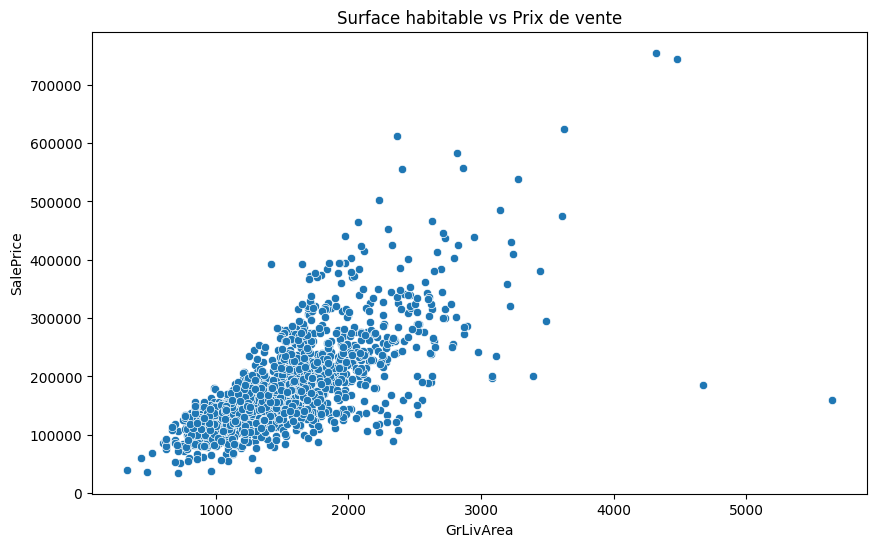

In [155]:
# Visualiser les relations entre Surface habitable et Prix de vente
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('Surface habitable vs Prix de vente')
plt.show()

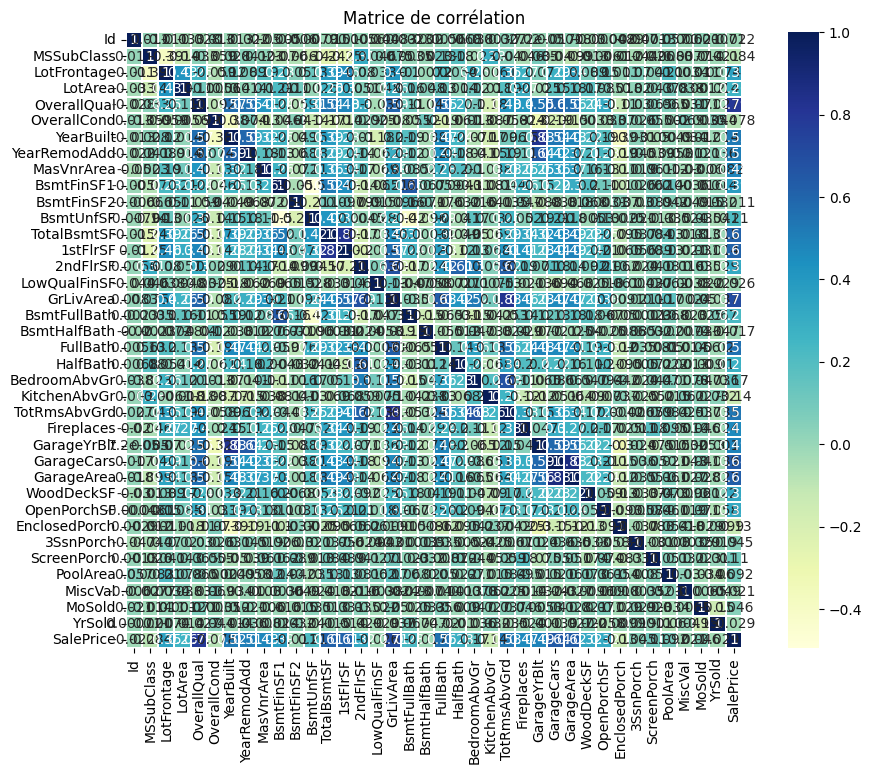

In [156]:
 #Heatmap de la corrélation des variables numériques
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu',linewidths=0.1,vmax=1.0,linecolor='white',square=True)
plt.title('Matrice de corrélation')
plt.show()

comme que la cercle de correlation n'est pas du tous cleaire donc on va supprimer les variables qui n'ont pas d'influence sur notre analyse et ainsi les variabnles qualitative moin important

In [157]:
#calcul de la correlation entre les variables et la variable SalePrice
# Calculer les corrélations
correlations = df.corr()

# Extraire les corrélations avec SalePrice et les trier
saleprice_corr = correlations['SalePrice'].sort_values(ascending=False)

print(saleprice_corr)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [158]:
df2=data.select_dtypes(exclude=['int64','float64'])
df2.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [159]:
data=data.drop(['EnclosedPorch','MiscVal','EnclosedPorch','3SsnPorch','HalfBath','BsmtFinType2','MiscFeature'],axis=1)

In [160]:
data.shape

(1460, 75)

## Nettoyage de données

### Handing missing values

In [161]:
data_na=data.isna().sum()
data_na

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

### La proportion de valeur manquantes

In [162]:
data_na_proportion=data_na/len(data)*100
data_na_proportion

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 75, dtype: float64

### Isolation des variables qui posséde des valeurs manquantes

In [163]:
missdata=data_na_proportion.drop(data_na_proportion[data_na_proportion==0].index).sort_values(ascending=False)
missdata=pd.DataFrame({'MissData_Ratio':missdata})
print(missdata)

              MissData_Ratio
PoolQC             99.520548
Alley              93.767123
Fence              80.753425
MasVnrType         59.726027
FireplaceQu        47.260274
LotFrontage        17.739726
GarageType          5.547945
GarageYrBlt         5.547945
GarageFinish        5.547945
GarageQual          5.547945
GarageCond          5.547945
BsmtExposure        2.602740
BsmtFinType1        2.534247
BsmtCond            2.534247
BsmtQual            2.534247
MasVnrArea          0.547945
Electrical          0.068493


### Imputation des valeur manquantes

In [164]:
#Pour les variables categoriels
data['PoolQC']=data['PoolQC'].fillna(data['PoolQC'].mode()[0])
data['Alley']=data['Alley'].fillna(data['Alley'].mode()[0])
data['Fence']=data['Fence'].fillna(data['Fence'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

In [165]:
#Pour les variables numerique
#*****MasVnrArea
MasVnrArea_moy=data['MasVnrArea'].mean()##calcul de la moyenne de la variable 
MasVnrArea_std=data['MasVnrArea'].std() ## calcul l'ecart type de la variable 
MasVnrArea_nu=data['MasVnrArea'].isnull().sum()##calcul nmbre d'abs manquantes
#*****GarageYrBlt
GarageYrBlt_moy=data['GarageYrBlt'].mean()##calcul de la moyenne de la variable 
GarageYrBlt_std=data['GarageYrBlt'].std() ## calcul l'ecart type de la variable 
GarageYrBlt_nu=data['GarageYrBlt'].isnull().sum()##calcul nmbre d'abs manquante

In [166]:
MasVnrArea_null_random_list=np.random.uniform(MasVnrArea_moy-MasVnrArea_std,MasVnrArea_moy+MasVnrArea_std,size=MasVnrArea_nu)
data['MasVnrArea'][np.isnan(data['MasVnrArea'])]=MasVnrArea_null_random_list

GarageYrBlt_null_random_list=np.random.uniform(GarageYrBlt_moy-GarageYrBlt_std,GarageYrBlt_moy+GarageYrBlt_std,size=GarageYrBlt_nu)
data['GarageYrBlt'][np.isnan(data['GarageYrBlt'])]=GarageYrBlt_null_random_list

C:\Users\PC\AppData\Local\Temp\ipykernel_12936\3664442593.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['MasVnrArea'][np.isnan(data['MasVnrArea'])]=MasVnrArea_null_random_list
C:\Users\PC\AppData\Local\Temp\ipykernel_12936\3664442

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Boxplot du variable LotArea 

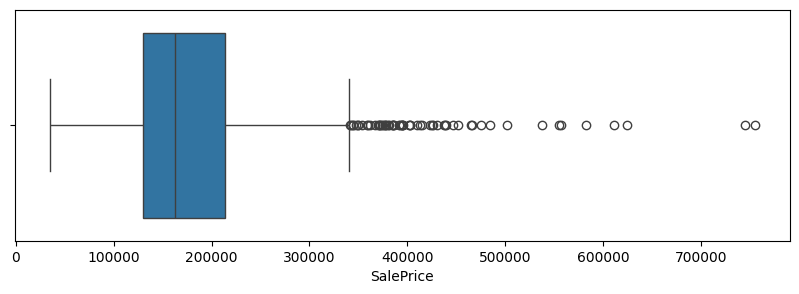

In [168]:
# Diagrammes de boîte pour visualiser les variables numériques
plt.figure(figsize=(10,3))
sns.boxplot(x='SalePrice',data=df,meanline=True)
plt.show()

### detection des valeurs aberrante

In [169]:
X=data.dropna(subset=['SalePrice'])[['SalePrice']]
outlier_detection = IsolationForest(contamination=0.05, random_state=42)
outliers = outlier_detection.fit_predict(X)
is_inlier = outliers != -1

In [170]:
outlier_indices = np.where(outliers == -1)
print('Nombre de valeurs abberantes:', len(outlier_indices[0]))

Nombre de valeurs abberantes: 73


### detection des valeurs repetées

In [171]:
def add_duplicates(data, percentage):
    duplicates = data.sample(n=int(percentage * len(data)))
    return pd.concat([data, duplicates], ignore_index=True)

In [172]:
data_with_duplicates = add_duplicates(data, 0.05)
print(len(data_with_duplicates))

1533


In [173]:
data_with_duplicates.duplicated().sum()

73

### suppression des valeurs repetées

In [174]:
data = data_with_duplicates.drop_duplicates()

In [175]:
data.duplicated().sum()

0

In [176]:
data.shape

(1460, 75)

###  Transformation des variables

### Statistique Descriptive des variables categoriels

In [177]:
df1= data.select_dtypes(exclude=['int','float'])
df1.astype('object').describe().transpose()
df1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Gd,Attchd,RFn,TA,TA,Y,Gd,GdPrv,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,WD,Normal


## Normalisation

In [178]:
normalized_age = MinMaxScaler().fit_transform(data['LotArea'].values.reshape(-1, 1))
normalized_age_data = pd.DataFrame(normalized_age, columns=['LotArea normalisé'])

ages = pd.concat([data['LotArea'], normalized_age_data], axis=1)
ages.head(10)

,LotArea,LotArea normalisé
0,8450,0.033420
1,9600,0.038795
2,11250,0.046507
3,9550,0.038561
4,14260,0.060576
5,14115,0.059899
6,10084,0.041057
7,10382,0.042450
8,6120,0.022529
9,7420,0.028605


In [179]:
data.MSZoning.value_counts(normalize=True)

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64

In [180]:
data.Street.value_counts(normalize=True)

Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64

## Models Creation

In [181]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchS

In [182]:
#La division du Train
#Les varaibles explicatives
featers_list=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']   
#la variable à expliqué
target_variable='SalePrice'

In [183]:
X=data.loc[:,featers_list]
Y=data.loc[:,target_variable]

## Encoding categorical variable

In [184]:
# Encoder les variables catégorielles
X=pd.get_dummies(X,drop_first=True)
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


## Noramalistion de X

In [185]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [186]:
X

array([[-1.73086488,  0.07337496, -0.14618854, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276,  0.52499153, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496, -0.01195252, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939, -0.1014432 , ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276, -0.01195252, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276,  0.30126484, ..., -0.11785113,
         0.4676514 , -0.30599503]])

### Divide dataset to Train set & Test set

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [188]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [189]:
# Régression linéaire
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
Y_pred_lr = lr.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
print(f'RMSE Régression Linéaire: {rmse_lr}')
score_train=lr.score(X_train,Y_train)
score_test=lr.score(X_test,Y_test)
print('score_train',score_train)
print('score_test',score_test)

RMSE Régression Linéaire: 25023747165095.08
score_train -6.709654669371314e+18
score_test -5.210799754291169e+18


In [190]:
# Forêt aléatoire
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(f'RMSE Forêt Aléatoire: {rmse_rf}')
score_train=rf.score(X_train,Y_train)
score_test=rf.score(X_test,Y_test)
print('score_train',score_train)
print('score_test',score_test)

RMSE Forêt Aléatoire: 29131.665056067777
score_train 0.9790860395705204
score_test 0.8893588243817155


In [191]:
# Régression Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, Y_train)
Y_pred_lasso = lasso.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(Y_test, Y_pred_lasso))
print(f'RMSE Lasso: {rmse_lasso}')
score_train=lasso.score(X_train,Y_train)
score_test=lasso.score(X_test,Y_test)
print('score_train',score_train)
print('score_test',score_test)

RMSE Lasso: 51100.00221624383
score_train 0.9265260425330651
score_test 0.6728601141944148


C:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.852e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [192]:
# Régression Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, Y_train)
Y_pred_ridge = ridge.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred_ridge))
print(f'RMSE Ridge: {rmse_ridge}')
score_train=ridge.score(X_train,Y_train)
score_test=ridge.score(X_test,Y_test)
print('score_train',score_train)
print('score_test',score_test)

RMSE Ridge: 47760.91004769555
score_train 0.9276637741685917
score_test 0.7136961313183573


In [193]:
# XGBoost
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost.fit(X_train, Y_train)
Y_pred_xgboost = xgboost.predict(X_test)
rmse_xgboost = np.sqrt(mean_squared_error(Y_test, Y_pred_xgboost))
print(f'RMSE XGBoost: {rmse_xgboost}')
score_train=xgboost.score(X_train,Y_train)
score_test=xgboost.score(X_test,Y_test)
print('score_train',score_train)
print('score_test',score_test)

RMSE XGBoost: 26137.542850572172
score_train 0.9954750287207337
score_test 0.9109332344137643


## Interface Gradio

In [204]:
import gradio as gr
import pandas as pd
import numpy as np
from PIL import Image
from xgboost import XGBRegressor
from gradio import Textbox, Number, Image, Interface
import os
# Prediction function (handle separate arguments for individual user input)
def predict_price(ms_zoning, lot_frontage, lot_area, street, Nombre_of_rooms # ... add other feature arguments
                  ):
    # Create a dictionary from user input (adjust based on your features)
    user_input = {
        "MSZoning": ms_zoning,
        "LotFrontage": lot_frontage,
        "LotArea": lot_area,
        "Street": street,
        "TotRmsAbvGrd":Nombre_of_rooms,
        # ... add other features and their corresponding values
    }

    # Predict sale price
    predicted_price = model.predict(X)[0]

    return predicted_price

# Define Gradio input components based on your features (replace with your data types)
inputs = [
    gr.Dropdown(choices=data["MSZoning"].unique().tolist(),label="Type de zone"),
    gr.Number(label="Facade"),
    gr.Number(label="Superficie du terain"),
    gr.Dropdown(choices=data["Street"].unique().tolist(),label="Street"),
    gr.Number(label="Nombre des chambres"),
    # ... add other Gradio input components for remaining features
]

# Define Gradio output
outputs = gr.Number(label="Predicted Sale Price (USD)")

# Create and launch the Gradio interface
interface = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=outputs,
    title="Estimation du prix de vente d'une maison",
    description="Entrez les caractéristiques de la maison pour estimer le prix de vente.",
)

interface.launch()

Running on local URL:  http://127.0.0.1:7880

To create a public link, set `share=True` in `launch()`.
